# **EDA of Covid-19 Dataset:** 
## Done by **Faizan Ahmad** (ma143faizan@gmail.com)
### Dated: May 22nd, 2024
### Dateset Link: https://www.kaggle.com/datasets/zusmani/pakistan-corona-virus-citywise-data/data

## **EDA Goals:**
- **Seeing the distribution of data i.e., How the cases are increasing or decreasing with each day.** ✔
- **Comparison of Reported cases with deaths and recovered on each date of the whole population.** ✔
- **City with maximum of reported cases, deaths and recovery.** ✔
- **Total numbers of cases, deaths and recovered on each date.** ✔
- **To look at which travel history caused most cases.** ✔

In [1]:
# Importing the needed libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset
df = pd.read_csv(r'PK COVID-19.csv')

In [2]:
df.head()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1.0,0.0,0.0,Iran/Taftan,Gilgit-Baltistan,Gilgit


In [3]:
df.Travel_history.unique()

array(['China', 'Iran/Taftan', 'Unknown', 'Syria', 'UK',
       'Local - Social Contact', 'USA', 'KSA', 'Local - Covid Relative',
       'International Passenger', 'Dubai', 'Tableeghi Jamaat',
       'Tableegi Jamaat', 'Jail', 'India', nan], dtype=object)

Tableegi Jamaat is repeated twice in the dataset so we can replace the text to make them one category.

In [4]:
df.Travel_history.replace('Tableeghi Jamaat', 'Tableegi Jamaat', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            848 non-null    object 
 1   Cases           848 non-null    float64
 2   Deaths          848 non-null    float64
 3   Recovered       848 non-null    float64
 4   Travel_history  847 non-null    object 
 5   Province        847 non-null    object 
 6   City            847 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.6+ KB


What I learnt: 
- Total 850 rows and 7 columns.
- The date column's data type needs to be converted.
- Cases, Deaths and Recovered Columns' data types should be converted to integer.
- Check for rows that have NAN value, if only 3 such rows then drop 'em.

In [6]:
# The rows that have missing values
df[df.isna().any(axis=1)]

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,Total,8415.0,168.0,2135.0,NaN,NaN,NaN


We can see that the rows that have missing values are the last 3 rows, so we can drop them and even two of them are completely empty ...

And the last row shows a total sum of values in the above rows ...

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(847, 7)

In [9]:
# Now we will convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
# Converting the float type to int
cols = df.select_dtypes(include=['float64']).columns
df[cols] = df[cols].astype(int)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847 entries, 0 to 846
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            847 non-null    datetime64[ns]
 1   Cases           847 non-null    int32         
 2   Deaths          847 non-null    int32         
 3   Recovered       847 non-null    int32         
 4   Travel_history  847 non-null    object        
 5   Province        847 non-null    object        
 6   City            847 non-null    object        
dtypes: datetime64[ns](1), int32(3), object(3)
memory usage: 75.3+ KB


In [12]:
# Now that we have done all the necessary pre-processing, we can check the distribution of the data
df[['Cases','Deaths','Recovered']].describe()

,Cases,Deaths,Recovered
count,847.000000,847.000000,847.000000
mean,9.935065,0.198347,2.520661
std,22.721862,0.790515,16.062577
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,8.000000,0.000000,0.000000
max,366.000000,10.000000,273.000000


What I am able to understand from this text:
- The maximum number of cases in a day are 366.
- The maximum number of deaths in a day are 10.
- The maximum number of recovered cases in a day are 273.

If we check the distibution of this data; there is certainly a skewness in the data. We can check this by plotting the histogram of the data.

In [13]:
# Checking for the range of dates so that proper binning can be done if needed
print(df['Date'].min())
print(df['Date'].max())
df.range = df['Date'].max() - df['Date'].min()
print("There are total", df.range.days, "days in the dataset")


2020-02-26 00:00:00
2020-04-19 00:00:00
There are total 53 days in the dataset


In [14]:
# Sorting the data based on the date
df = df.sort_values(by='Date')

In [15]:
# to see if there are some rows that have duplicate values in date, travel_history_location, city
df[df.duplicated(subset=['Date','Travel_history','City'], keep=False)]

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
67,2020-03-20,16,0,0,Local - Social Contact,Sindh,Karachi
57,2020-03-20,4,1,0,Local - Social Contact,Sindh,Karachi
115,2020-03-24,3,0,0,Local - Social Contact,Sindh,Karachi
101,2020-03-24,3,0,10,Local - Social Contact,Sindh,Karachi
99,2020-03-24,8,0,6,Local - Social Contact,Sindh,Karachi
248,2020-03-31,0,0,0,Unknown,Khyber Pakhtunkhwa,Peshawar
256,2020-03-31,10,0,0,Unknown,Khyber Pakhtunkhwa,Peshawar
417,2020-04-07,11,0,27,Local - Social Contact,Sindh,Karachi
416,2020-04-07,54,1,16,Local - Social Contact,Sindh,Karachi
549,2020-04-10,8,0,0,Local - Social Contact,Khyber Pakhtunkhwa,Peshawar


**What I am able to understand from this:**
- For same city, with same travel_history and on same date there are different number of cases recorded. I'll take the one with maximum value considering it was a total for that day.

In [16]:
# Sorting the DataFrame
df_sorted = df.sort_values(by=['Date'])

# Grouping by specified columns and aggregating while keeping the maximum value
df = df_sorted.groupby(['Date', 'Travel_history', 'City']).agg({
    'Cases': 'max',
    'Deaths': 'max',
    'Recovered': 'max'
}).reset_index()
df

,Date,Travel_history,City,Cases,Deaths,Recovered
0,2020-02-26,China,Islamabad,1,0,0
1,2020-02-26,Iran/Taftan,Karachi,2,0,0
2,2020-02-29,China,Islamabad,1,0,0
3,2020-02-29,Iran/Taftan,Karachi,1,0,0
4,2020-03-02,Iran/Taftan,Gilgit,1,0,0
...,...,...,...,...,...,...
833,2020-04-19,Local - Social Contact,Sheikhupura,3,0,0
834,2020-04-19,Local - Social Contact,Sialkot,23,0,0
835,2020-04-19,Local - Social Contact,Toba Tek Singh,5,0,0
836,2020-04-19,Tableegi Jamaat,Lahore,0,0,29


In [17]:
df.shape

(838, 6)

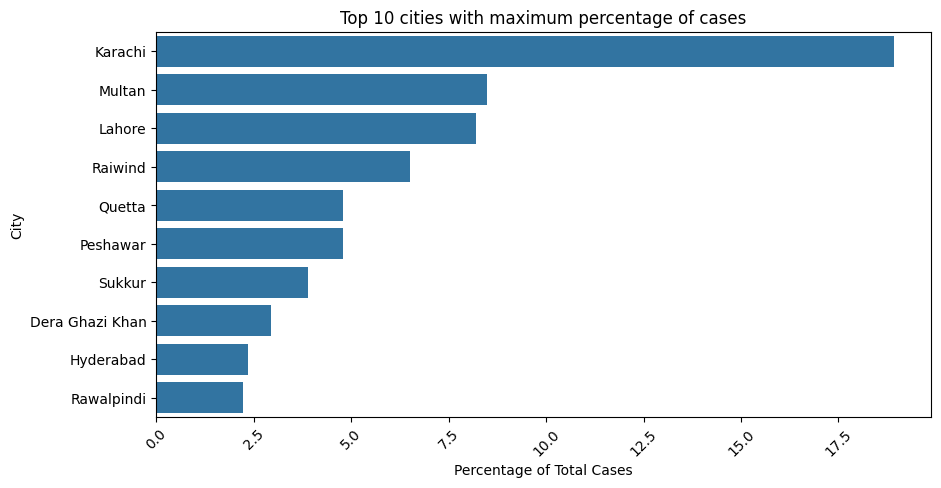

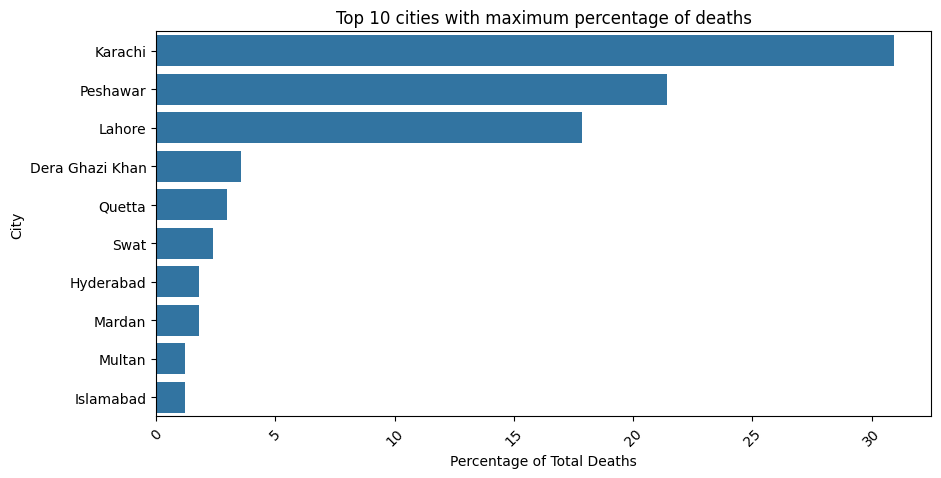

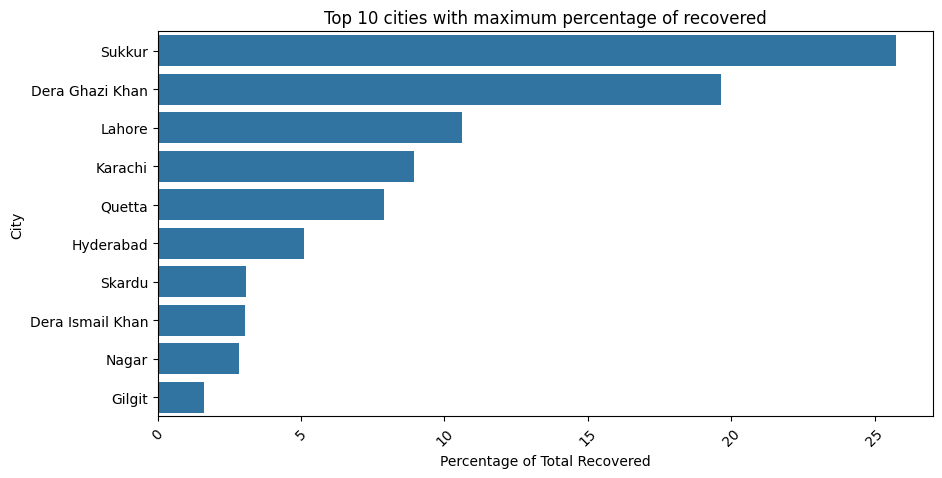

In [18]:

# Calculate percentages
total_cases = df['Cases'].sum()
total_deaths = df['Deaths'].sum()
total_recovered = df['Recovered'].sum()

df['Cases_Percentage'] = (df['Cases'] / total_cases) * 100
df['Deaths_Percentage'] = (df['Deaths'] / total_deaths) * 100
df['Recovered_Percentage'] = (df['Recovered'] / total_recovered) * 100

# City with maximum percentage of cases
df_city_cases = df.groupby('City')['Cases_Percentage'].sum().sort_values(ascending=False).reset_index()
df_city_cases = df_city_cases.head(10)
plt.figure(figsize=(10,5))
sns.barplot(y='City', x='Cases_Percentage', data=df_city_cases)
plt.xticks(rotation=45)
plt.title('Top 10 cities with maximum percentage of cases')
plt.xlabel('Percentage of Total Cases')
plt.show()

# City with maximum percentage of deaths
df_city_deaths = df.groupby('City')['Deaths_Percentage'].sum().sort_values(ascending=False).reset_index()
df_city_deaths = df_city_deaths.head(10)
plt.figure(figsize=(10,5))
sns.barplot(y='City', x='Deaths_Percentage', data=df_city_deaths)
plt.xticks(rotation=45)
plt.title('Top 10 cities with maximum percentage of deaths')
plt.xlabel('Percentage of Total Deaths')
plt.show()

# City with maximum percentage of recovered
df_city_recovered = df.groupby('City')['Recovered_Percentage'].sum().sort_values(ascending=False).reset_index()
df_city_recovered = df_city_recovered.head(10)
plt.figure(figsize=(10,5))
sns.barplot(y='City', x='Recovered_Percentage', data=df_city_recovered)
plt.xticks(rotation=45)
plt.title('Top 10 cities with maximum percentage of recovered')
plt.xlabel('Percentage of Total Recovered')
plt.show()


From these graphs, we can understand that:
- **Karachi** is the city with maximum number of reported cases and deaths in the given date duration. 
- And **Sukkur** is the one city with maximum recovery rate of Covid patients.

In [19]:
df.head(2)

,Date,Travel_history,City,Cases,Deaths,Recovered,Cases_Percentage,Deaths_Percentage,Recovered_Percentage
0,2020-02-26,China,Islamabad,1,0,0,0.011913,0.0,0.0
1,2020-02-26,Iran/Taftan,Karachi,2,0,0,0.023827,0.0,0.0


In [20]:
# Comparison of Reported cases with deaths and recovered on each date of the whole population.
print("Total number of cases reported:",total_cases)
print("Total number of deaths recorded:",total_deaths)
print("Total number of recovered recorded:",total_recovered)
print("-------------------------------------------")
print("Totaldeaths + Total recovered:", total_deaths + total_recovered)


Total number of cases reported: 8394
Total number of deaths recorded: 168
Total number of recovered recorded: 2113
-------------------------------------------
Totaldeaths + Total recovered: 2281


There was certainly some problem while recording the data for recovered and dead. 

But we'll skip that part for now ... And just see the comparison of cases vs. deaths & recovered.

In [21]:
df.drop(columns=["Cases_Percentage", "Deaths_Percentage", "Recovered_Percentage"], axis=1, inplace=True)

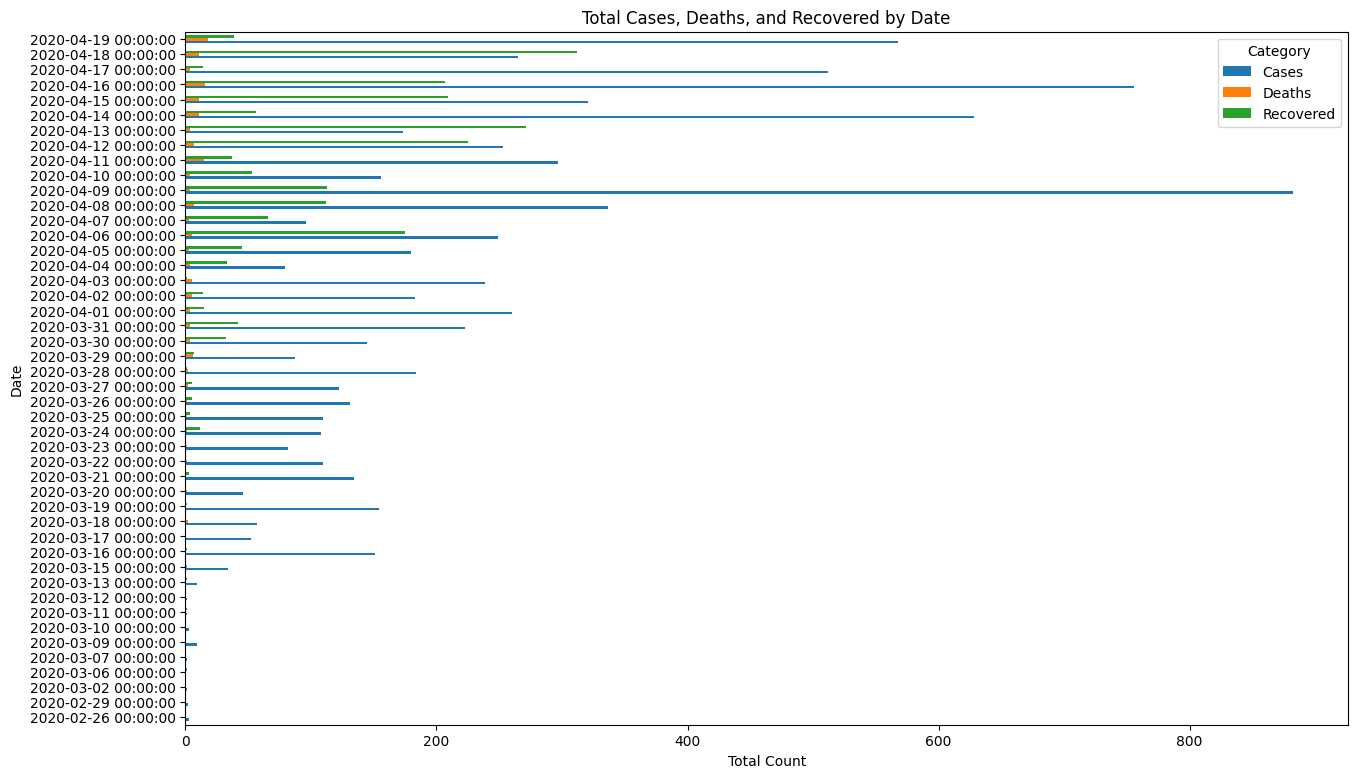

In [22]:
import matplotlib.pyplot as plt

# Grouping by 'Date' and calculating the sum of each column
df_grouped = df.groupby('Date').sum()

# Plotting the bar chart
df_grouped.plot(kind='barh', stacked=False, figsize=(15, 9))
plt.title('Total Cases, Deaths, and Recovered by Date')
plt.xlabel('Total Count')
plt.ylabel('Date')
plt.legend(title='Category')
plt.show()


From this we are able to understand that: 
- Either Covid was almost non-existent by the end of Feb 2020 or data collection was not being done.
- As days passed by, there was an increase in Covid cases reported with **maximum number of cases (over 800) being recorded on April 8th, 2020**.
- Then there was a slight drop in cases being reported for few days after April 8th, but it again started.
- **Maximum number of patients reported to recover (over 350) was on April 18th, 2020.**
- **Maximum deaths (10) occured on April 19th, 2020.**

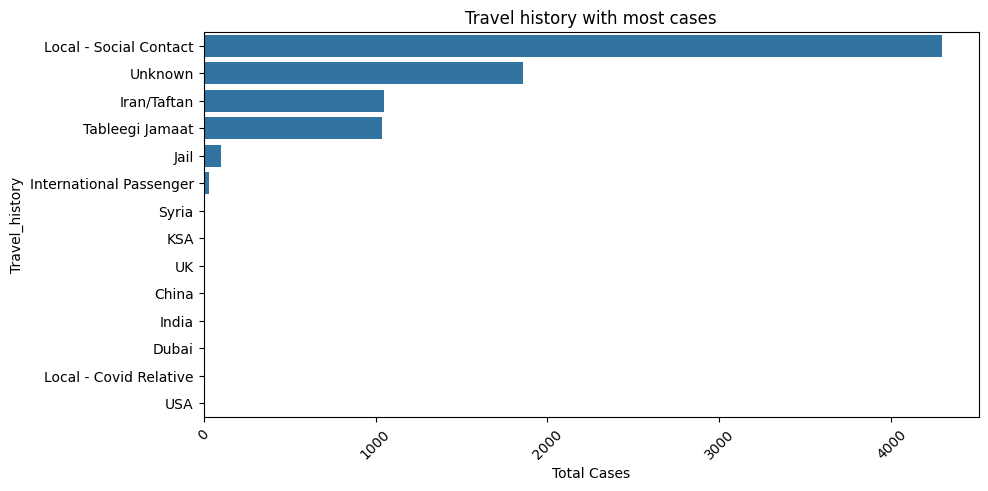

In [23]:
# To see which travel history has the most cases
df_travel = df.groupby('Travel_history')['Cases'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(y='Travel_history', x='Cases', data=df_travel)
plt.xticks(rotation=45)
plt.title('Travel history with most cases')
plt.xlabel('Total Cases')
plt.show()

- From the graph, we can see that **Social Contact was the top most cause** of causing the spread of COVID-19.
- **The second in list is unknown**; most probably it means that a person must've visited lots of places and is unsure of from where he got Covid.
- Even from news articles, it was clear that most of the cases that were being reported were the **zaireens returning from Iran** and the **persons who went with Tableegi Jamaats** (that is also a fair example of Social Contact) ...

## **Trying different Models according to the dataset:**

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target variable
X = df[['Travel_history', 'City']]
y = df['Cases']

# Preprocessing and one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Travel_history', 'City'])
    ],
    remainder='passthrough'  # Keeps the other columns unchanged
)

# Define the models and parameter grids
models = [
    ('LinearRegression', LinearRegression(), {}),
    ('RandomForest', RandomForestRegressor(), {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20, 30]
    }),
    ('GradientBoosting', GradientBoostingRegressor(), {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7]
    }),
    ('SVR', SVR(), {
        'regressor__kernel': ['linear', 'poly', 'rbf'],
        'regressor__C': [0.1, 1, 10]
    })
]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_models = []
for name, model, params in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models.append((name, grid_search.best_estimator_, grid_search.best_score_))
    print(f"Best {name} Model: {grid_search.best_params_} with R^2 Score: {grid_search.best_score_}")

# Evaluate the best models on the test set
for name, best_model, best_score in best_models:
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Test Mean Squared Error: {mse}, R^2 Score: {r2}")




Best LinearRegression Model: {} with R^2 Score: -0.12256908619281415
Best RandomForest Model: {'regressor__max_depth': None, 'regressor__n_estimators': 200} with R^2 Score: 0.011668897066429106
Best GradientBoosting Model: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 7, 'regressor__n_estimators': 50} with R^2 Score: 0.1251058254944946
Best SVR Model: {'regressor__C': 10, 'regressor__kernel': 'poly'} with R^2 Score: 0.09235537595265435
LinearRegression - Test Mean Squared Error: 187.46017591931502, R^2 Score: -0.07033073309900817
RandomForest - Test Mean Squared Error: 265.0751933508483, R^2 Score: -0.5134847955530049
GradientBoosting - Test Mean Squared Error: 161.85587704350445, R^2 Score: 0.07586067983355993
SVR - Test Mean Squared Error: 169.3202002773224, R^2 Score: 0.033242056865986136


Based on the output from the GridSearchCV and the evaluation metrics on the test set, **the Gradient Boosting model** with the parameters {'regressor__learning_rate': 0.01, 'regressor__max_depth': 7, 'regressor__n_estimators': 50} **is the best model** for this dataset. Here's the reasoning:

- **Highest R² Score on the Test Set:** The Gradient Boosting model achieved the highest R² score of 0.07587498438368978, indicating that it explains approximately 7.59% of the variance in the number of cases, which is better compared to other models.
- **Lowest Mean Squared Error on the Test Set:** The Gradient Boosting model has a lower Mean Squared Error (MSE) of 161.85337171183372 compared to other models (except Linear Regression, which is less reliable given its negative R² score).

## **We can try to make predictions based on the following code if we want to but obviously while not expecting too much of accurate results.**


In [27]:
# Function to make future predictions
def predict_future_cases(travel_history, city, model):
    features = {
        'Travel_history': [travel_history],
        'City': [city]
    }
    future_df = pd.DataFrame(features)
    return model.predict(future_df)[0]

# Example prediction with the best model 
travel_history = 'China'
city = 'Islamabad'
best_model = best_models[2][1]  # Change index based on the best model found

predicted_cases = int(predict_future_cases( travel_history, city, best_model))
print(f"Predicted number of cases for city {city} with travel history {travel_history}: {predicted_cases}")


Predicted number of cases for city Islamabad with travel history China: 10
